In [ ]:
import numpy as np
import scipy.io.wavfile
import IPython.display
from scipy import signal           # Signal is used to find the frequency response points of the single formant resonator
import numpy as np                 # numpy library is imported
import matplotlib.pyplot as plt    # matplotlib is used to plot figures

## Question 1

In [ ]:
fs, x_orig = scipy.io.wavfile.read('aa.wav');  # Reads the data from .wav file in variable x and sampling rate fs.
print("Sampling rate of aa.wav: " + str(fs)+" Hz"); # Display the sampling rate for aa.wav file
print("Duration of aa.wav file is: "+str(len(x_orig)*1000/fs)+" ms");  # display the duration of aa.wav file

# APPLYING PRE-EMPHASIS TO THE SIGNAL
x = np.zeros(len(x_orig));  # declare a zero array of same length as original array
x[0] = x_orig[0];
for i in range(1,len(x),1):
  x[i] = x_orig[i]-0.6969*x_orig[i-1];

Sampling rate of aa.wav: 8000 Hz
Duration of aa.wav file is: 90.0 ms


**Important Points:**

1) We applied the pre-emphasis to the original signal.

2) The pre-emphasis filter is given by: $1-α*z^{-1}$, where α = $\frac{r[1]}{r[0]}$ as per class discussion.

3) $\frac{r[1]}{r[0]} = 0.6969$ in this case. By directly using $α = 0.95$, I am getting an unstable system so I used this method. Same factor was during de-emphasis.

## Question 2

In [ ]:
def createHammingWindow(duration,sampFreq):
  numSamples = duration*sampFreq;                                 # number of window samples = duration * sampling rate
  hammingWin = np.zeros(int(numSamples),dtype=np.float_);         # declare a hamming window
  for i in range(int(numSamples)):
    hammingWin[i] = 0.54-0.46*np.cos(2*np.pi*i/int(numSamples));  # creates a Hamming Window using this equation
  return hammingWin                                               # return the created hamming Window

**Important points:**

1) The above function createhammingWindow() is used to create a Hamming window of given time duration at a given sampling rate using the expression given as:

w[n] = 0.54 - 0.46 cos(2.pi.n/N) for a window of length L = N.

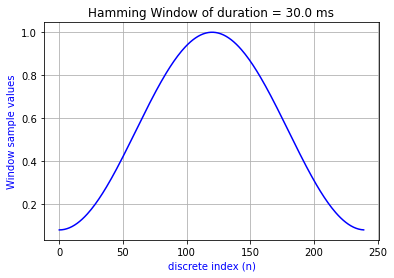

In [ ]:
winDuration = 30e-3;  # Create a hamming window of 30 ms duration for narrowband analysis
hammingWindow = createHammingWindow(winDuration,fs); # Call the createhammingWindow function
fig = plt.figure();
plt.title('Hamming Window of duration = ' + str(winDuration*1e3) + ' ms');    # title of the plot
plt.plot(range(int(fs*winDuration)), hammingWindow[:], 'b');                  # Plot the window function
plt.ylabel('Window sample values', color='b');                                # set the y axis label
plt.xlabel('discrete index (n)',color='b');                                   # set the discrete time axis label
plt.grid();                                                                   # display the grid of the plot
plt.axis('tight');                                                            # sets limits just large enough to show all data
plt.show();

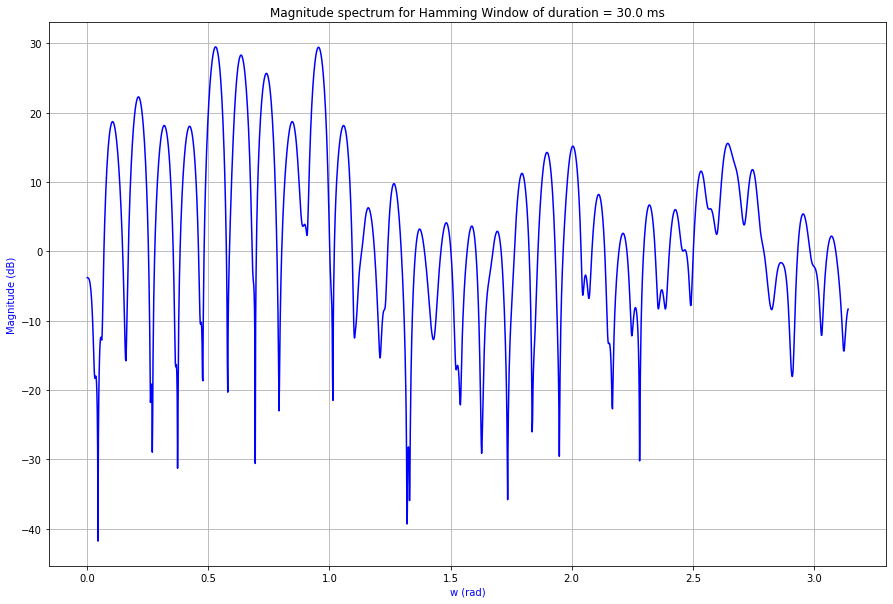

In [ ]:
# Here we multiply the signal with the hamming window signal by taking element wise multiplication
dft_len = 1024*4;
windowedSignal = np.multiply(hammingWindow,x[int(len(x)/2)-int(len(hammingWindow)/2):int(len(x)/2)+int(len(hammingWindow)/2)]);
windowedSignal_dft = np.fft.fft(windowedSignal, n=dft_len, norm= 'forward');    # Find the dft of windowed signal at specified number of dft points
mag = 20*np.log10(np.abs(windowedSignal_dft));                                  # Find out the magnitude of the computed DFT
fig = plt.figure(figsize=(15, 10));
plt.title('Magnitude spectrum for Hamming Window of duration = ' + str(winDuration*1e3) + ' ms'); # title of the plot
plt.plot(np.linspace(0,np.pi,int(dft_len/2)), mag[0:int(dft_len/2)], color = 'b');
plt.ylabel('Magnitude (dB)', color='b');              # set the y axis label
plt.xlabel('w (rad)',color='b');                      # set the discrete time axis label
plt.grid();                                           # display the grid of the plot
plt.axis('tight');                                    # sets limits just large enough to show all data
plt.show();

**Observations:**

1) Magnitude spectrum of the 30 ms interval of windowed audio signal around its center sample is plotted in the above figure.

2) Due to the tapered shape of Hamming Window it gives a very clear magnitude spectrum which is easier to analyze due to the absence of side lobes.

3) Since the length of Hamming Window used for this analysis is 30 ms, it represents a narrowband analysis. Therefore, we see lobes at multiples of fundamental frequency F0.

## Question 3 ##

In [ ]:
'''
References: https://numpy.org/doc/stable/reference/generated/numpy.correlate.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlation_lags.html#scipy.signal.correlation_lags
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html#scipy-signal-correlate
'''
# Below function calculates the correlation sequence for all possible values of lags
# The calculated correlation array is symmetric around sample index 239 which represents the signal energy
# signal energy coresponds to a lag of 0 in autocorrelation function

norm_windowedSignal = windowedSignal;
corr = scipy.signal.correlate(norm_windowedSignal, norm_windowedSignal, mode = 'full')[len(norm_windowedSignal)-1:];
#corr = corr/len(norm_windowedSignal);

# Below function returns the lag associated with each value calculated in the autocorrelation array
lags = scipy.signal.correlation_lags(np.size(windowedSignal), np.size(windowedSignal), mode='full');

# Here we find out the correlation coefficients for different lag values
corr_p_2 = corr[0:2+1];
corr_p_4 = corr[0:4+1];
corr_p_6 = corr[0:6+1];
corr_p_8 = corr[0:8+1];
corr_p_10 = corr[0:10+1];
print("Correlation coefficients for p = 2 are: "+ str(corr_p_2));
print("Correlation coefficients for p = 4 are: "+ str(corr_p_4));
print("Correlation coefficients for p = 6 are: "+ str(corr_p_6));
print("Correlation coefficients for p = 8 are: "+ str(corr_p_8));
print("Correlation coefficients for p = 10 are: "+ str(corr_p_10));

Correlation coefficients for p = 2 are: [6.74574279e+08 4.61681333e+08 1.20622307e+08]
Correlation coefficients for p = 4 are: [ 6.74574279e+08  4.61681333e+08  1.20622307e+08 -2.13346194e+08
 -3.81060017e+08]
Correlation coefficients for p = 6 are: [ 6.74574279e+08  4.61681333e+08  1.20622307e+08 -2.13346194e+08
 -3.81060017e+08 -3.02525189e+08 -1.28289474e+08]
Correlation coefficients for p = 8 are: [ 6.74574279e+08  4.61681333e+08  1.20622307e+08 -2.13346194e+08
 -3.81060017e+08 -3.02525189e+08 -1.28289474e+08  3.76321115e+07
  3.74649593e+07]
Correlation coefficients for p = 10 are: [ 6.74574279e+08  4.61681333e+08  1.20622307e+08 -2.13346194e+08
 -3.81060017e+08 -3.02525189e+08 -1.28289474e+08  3.76321115e+07
  3.74649593e+07  3.99469353e+07  5.50001809e+07]


**Observations:**

1) The auto-correlation coefficients for different values of lags are calculated above.

2) The autocorrelation magnitude decreases from first sample till the end. Sample with index = 0 represents the signal energy.

In [ ]:
# Levinson-Durbin recursion for computing LP Coefficients from auto-correlation coefficients.
def Levinson_Durbin(p, r):
  energy = np.zeros((p+1,1));     # Define a zero array of dimensions p*1 to store the energy
  a = np.zeros((p,1));          # Define array of zeros to store the LP Coefficients
  for i in range(1,p+1,1):  # p+1 to include pth index as range stops at p-1
    if i == 1:
      energy[i-1] = r[i-1]; # energy[0] = acf of signal at index 0
      k = r[i]/r[i-1];      # k is acually k1 here, k is the Reflection Coefficient
      energy[i] = (1-k**2)*energy[i-1]; # Energy of higher order error is less than the energy of lower order
      a[i-1] = k;           # a1(1) = k
      a_temp = a;
    elif i>1:
      sum = 0;
      for j in range(1,i-1+1):    # For loop to calculate the summation in k(i) equation
        sum = sum + a_temp[j-1]*r[i-j];
      k = (r[i] - sum)/energy[i-1]; # k in ith iteration
      a[i-1] = k; # a(i) = k
      for j in range(1,i-1+1):
        a[j-1] = a_temp[j-1] - k*a_temp[i-j-1]; # update the LP coefficients
      energy[i] = (1-k**2)*energy[i-1];         # update the energy for ith iteration
      a_temp = a;                               # update a_temp
  return energy,a

**Observations:**

1) The above function takes the LP order and autocorrelation vector for that order p.

2) It returns the computed energy of the error signal for each iteration along with the final Linear Prediction coefficients.

3) The Levinson-Durbin algorithm for calculation of LP coefficients is implemented here. This method is more efficient than matrix inversion. This method exploits the "Toeplitz" property of the autocorrelation matrix. It is useful for those models where the matrix is in Toeplitz form.

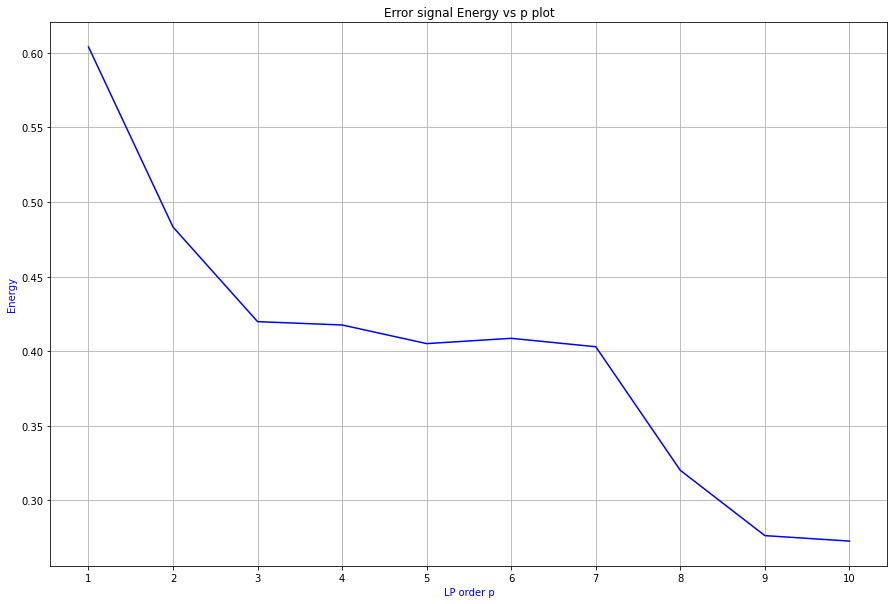

In [ ]:
p = 1;    # Start from prediction order p
x_norm = x/np.linalg.norm(x);   # normalize the pre-emphasised signal
err_energy = np.zeros((10,1));  # declare a numpy array of zeros
for k in range(10):
  ener,a = Levinson_Durbin(p,corr[0:p+1]);    # Calls the function which computes the LP coefficients
  err = np.zeros((len(x),1));
  for i in range(len(x_norm)):
    s = 0;                                    # Sum = 0 before every iteration
    for j in range(1,p+1,1):
      if (i-j) >= 0:                          # calculate sum only for causal indexes
        s = s + a[j-1]*x_norm[i-j];
    err[i] = x_norm[i] - s;
  err_energy[k] = np.sum(np.square(err));
  p = p + 1;
fig = plt.figure(figsize=(15, 10));
plt.title('Error signal Energy vs p plot');           # title of the plot
plt.plot(range(1,11,1), err_energy, color = 'b');     # Plot Energy vs p
plt.xticks(np.linspace(1, 10, 10, endpoint=True));    # Values to be displayed on horizontal axis
plt.ylabel('Energy', color='b');         # set the y axis label
plt.xlabel('LP order p',color='b');                   # set the horizontal axis label
plt.grid();                                           # display the grid of the plot
plt.axis('tight');                                    # sets limits just large enough to show all data
plt.show();

**Observations from the error signal energy vs p plot:**

1) As we increase the order $p$ of the linear predictor from $1$ to $10$, the error signal energy either reduces or remains at same level.

2) With increase in order $p$, the predictor uses more number of past samples of the signal to calculate the current sample in the predicted signal. This is the reason why accuracy increases as we increase the order of predictor.

3) For every order $p$, we found out the LP coefficients assocoated with that order using the correlation coefficients of windowed signal, then substract the predicted sample from the original sample to obtain the error signal.

4) Finally the energy of this error signal is plotted against $p$.

5) We are getting values in this range for error signal energy because we have applied normalized pre-emphasised signal as input to the predictor.

##Question 4##

In [ ]:
'''
Here we find out the poles for Linear Predictor with order p = 6
'''
p = 6; # Set prediction order p
energy,a = Levinson_Durbin(p,corr[0:p+1]);  # Calls the function which computes the LP coefficients
b = np.array([1]);    # Numerator coefficients array in transfer function 1/A(z)
a = np.append(b,-a);  # Denominator coefficients array in transfer function 1/A(z)
zeros, poles, k = scipy.signal.tf2zpk(b, a);  # Zeros, poles and system gain is found out here

Poles of the transfer function 1/A(z) for p = 6 are: 
[-0.63188414+0.44867756j -0.63188414-0.44867756j  0.6481751 +0.55560921j
  0.6481751 -0.55560921j  0.42456307+0.57804922j  0.42456307-0.57804922j]


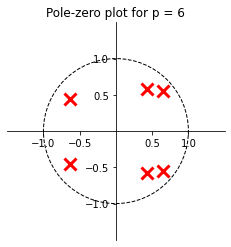

In [ ]:
# References: https://www.dsprelated.com/showcode/244.php
# get a figure/plot
from  matplotlib import patches
ax = plt.subplot(111);

# create the unit circle
uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed');
ax.add_patch(uc); # add the patch to the ax created above
print("Poles of the transfer function 1/A(z) for p = "+ str(p)+" are: "); # Display the poles of the transfer function
print(poles);

# Plot the zeros and set marker properties
t1 = plt.plot(zeros.real, zeros.imag, 'go', ms=10); # ms means marker size, plos the zeros
plt.setp(t1, markersize=10.0, markeredgewidth=1.0, markeredgecolor='k', markerfacecolor='g');

# Plot the poles and set marker properties
t2 = plt.plot(poles.real, poles.imag, 'rx', ms=10); # plot the poles
plt.setp( t2, markersize=12.0, markeredgewidth=3.0, markeredgecolor='r', markerfacecolor='r');  # set the parameters
ax.spines['left'].set_position('center'); # Set the position of the spine.Spines are the lines connecting the axis tick marks and noting the boundaries of the data area
ax.spines['bottom'].set_position('center'); # Brings the axes to the center of the graph
ax.spines['right'].set_visible(False);  # If True, then extreme right and top lines become visible
ax.spines['top'].set_visible(False);
plt.title("Pole-zero plot for p = "+str(p));
# set the ticks
r = 1.5;
plt.axis('scaled');
plt.axis([-r, r, -r, r]);
ticks = [-1, -.5, .5, 1];
plt.xticks(ticks);
plt.yticks(ticks);

In [ ]:
'''
Here we find out the poles for Linear Predictor with order p = 6
'''
p = 10; # Set prediction order p
energy,a = Levinson_Durbin(p,corr[0:p+1]);  # Calls the function which computes the LP coefficients
b = np.array([1]);    # Numerator coefficients array in transfer function 1/A(z)
a = np.append(b,-a);  # Denominator coefficients array in transfer function 1/A(z)
zeros, poles, k = scipy.signal.tf2zpk(b, a);  # Zeros, poles and system gain is found out here

Poles of the transfer function 1/A(z) for p = 10 are: 
[-0.86366083+0.43927108j -0.86366083-0.43927108j -0.31995452+0.87293528j
 -0.31995452-0.87293528j  0.55151661+0.82474037j  0.55151661-0.82474037j
  0.8181019 +0.49259615j  0.8181019 -0.49259615j  0.70430216+0.j
 -0.13676388+0.j        ]


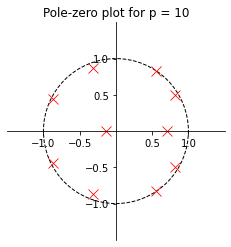

In [ ]:
# References: https://www.dsprelated.com/showcode/244.php

# get a figure/plot
from  matplotlib import patches
ax = plt.subplot(111);

# create the unit circle
uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed');
ax.add_patch(uc); # add the patch to the ax created above
print("Poles of the transfer function 1/A(z) for p = "+ str(p)+" are: "); # Display the poles of the transfer function
print(poles);

# Plot the zeros and set marker properties
t1 = plt.plot(zeros.real, zeros.imag, 'go', ms=10); # ms means marker size, plos the zeros
plt.setp(t1, markersize=10.0, markeredgewidth=0.4, markeredgecolor='k', markerfacecolor='g');

# Plot the poles and set marker properties
t2 = plt.plot(poles.real, poles.imag, 'rx', ms=10); # plot the poles
plt.setp( t2, markersize=10.0, markeredgewidth=0.8, markeredgecolor='r', markerfacecolor='r');  # set the parameters
ax.spines['left'].set_position('center'); # Set the position of the spine.Spines are the lines connecting the axis tick marks and noting the boundaries of the data area
ax.spines['bottom'].set_position('center'); # Brings the axes to the center of the graph
ax.spines['right'].set_visible(False);  # If True, then extreme right and top lines become visible
ax.spines['top'].set_visible(False);
plt.title("Pole-zero plot for p = "+str(p));
# set the ticks
r = 1.5;
plt.axis('scaled');
plt.axis([-r, r, -r, r]);
ticks = [-1, -.5, .5, 1];
plt.xticks(ticks);
plt.yticks(ticks);

**Observations:**

1) From the pole-zero plots and values of poles, in both cases (p=6,10) it can be observed that all the poles lie inside the unit circle.

2) This implies that the system is causal and stable. Causal because all poles lie inside the unit circle and stable because the region of convergence includes the unit circle.

3) This proves that the linear prediction coefficients found out using the Levinson-Durbin method result in a causal and stable system.

##Question 5##

Gain for p = 2 : [19394.78501513]


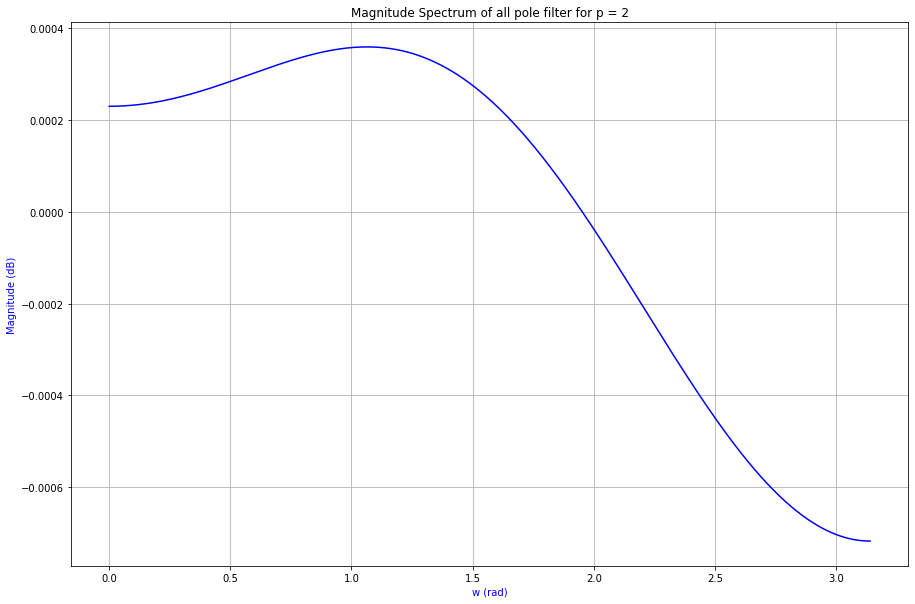

Gain for p = 4 : [26032.35935944]


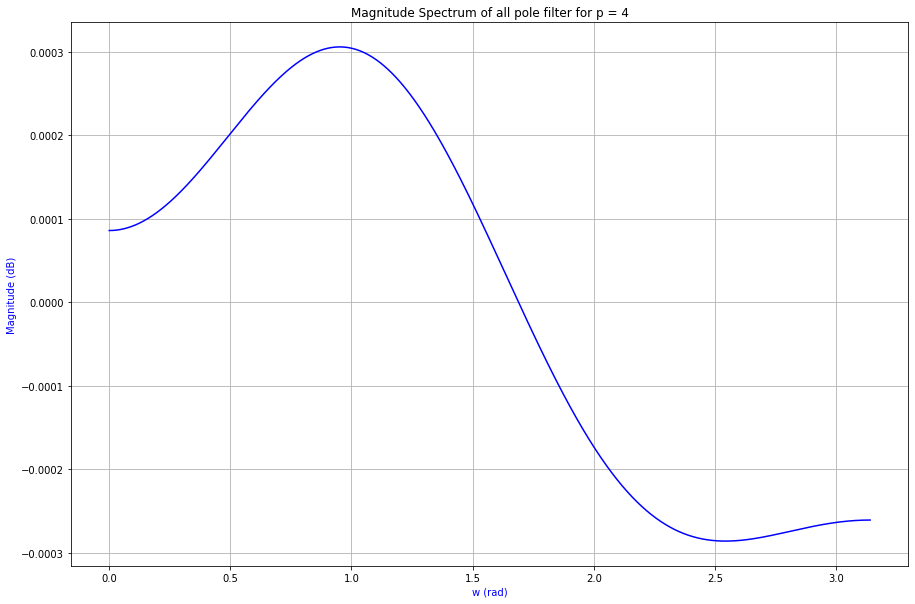

Gain for p = 6 : [27431.23679047]


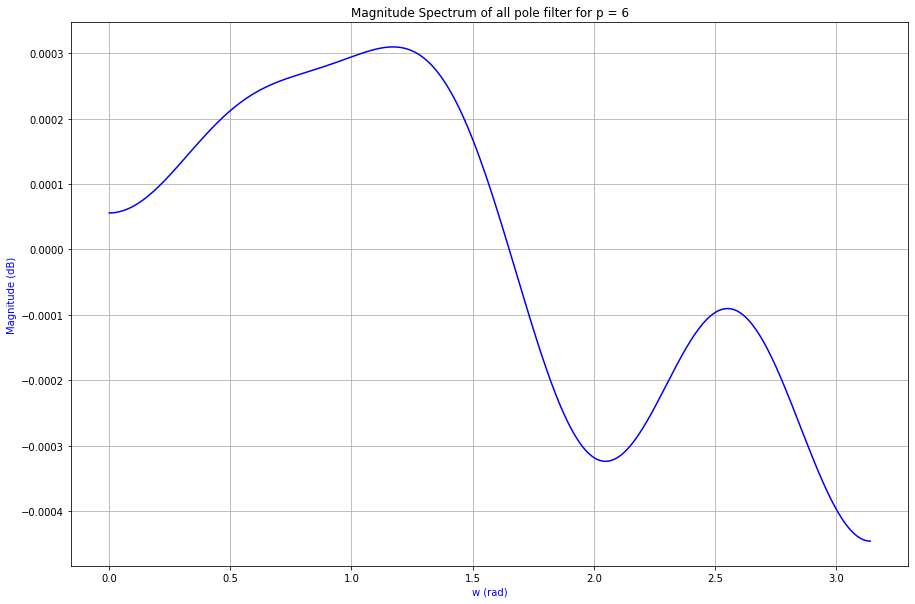

Gain for p = 8 : [23237.81944465]


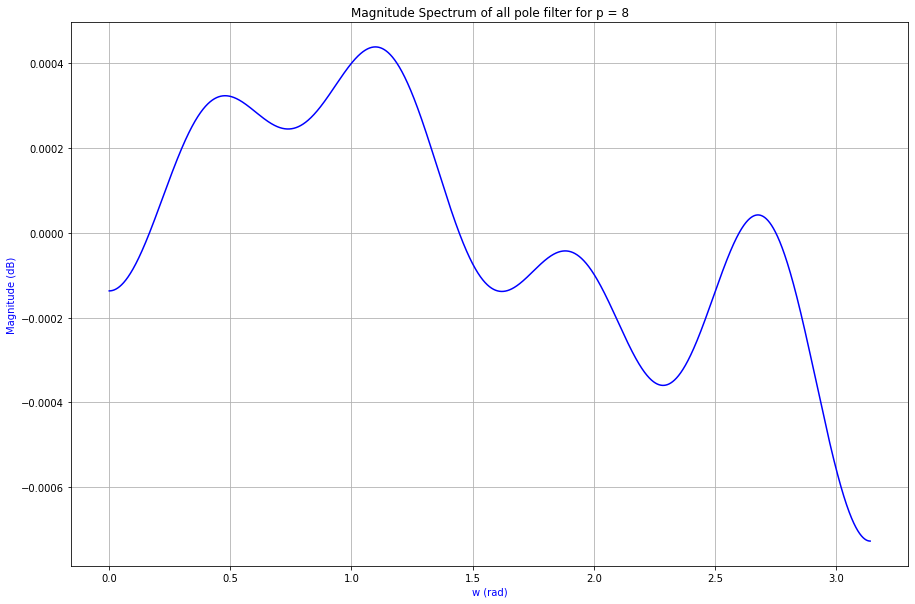

Gain for p = 10 : [27254.26514023]


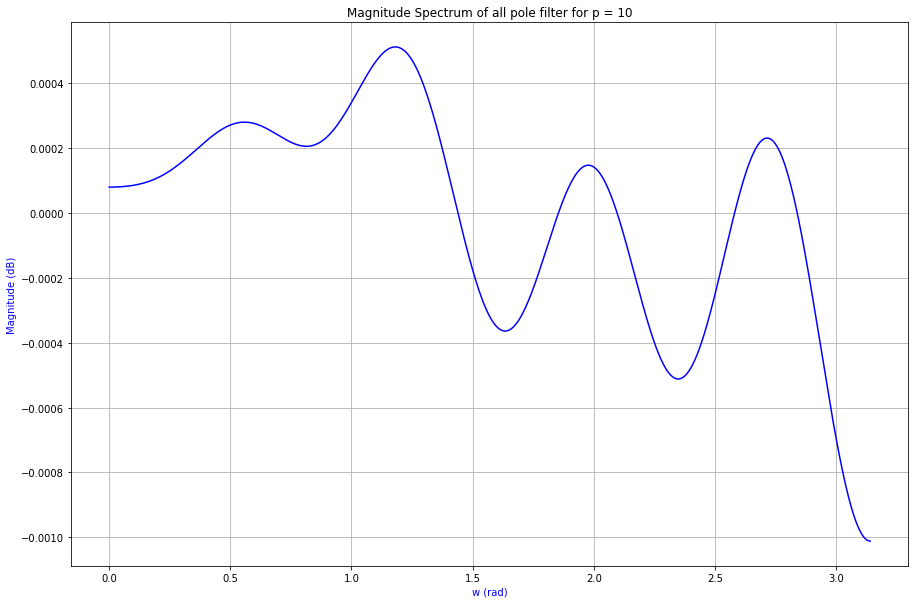

Magnitude spectrum of windowed signal using Hamming Window:


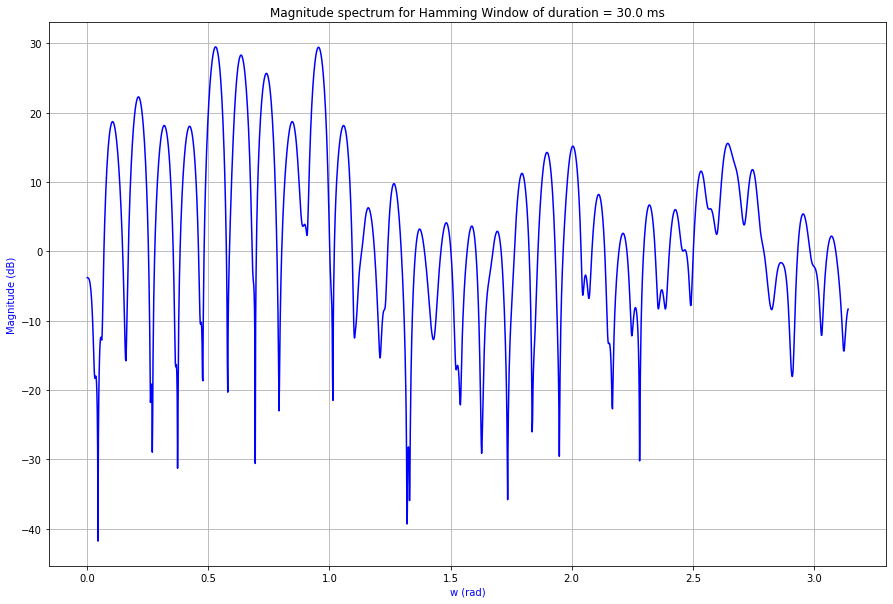

In [ ]:
from numpy.linalg import norm
p = 2;
e_min = np.zeros((5,1));
for i in range(len(e_min)):
  ener,a = Levinson_Durbin(p,corr[0:p+1]);              # Calls the function which computes the LP coefficients
  e_min[i] = corr[0] - np.sum(np.multiply(a,corr[1:(p+1)]));
  gain = np.sqrt(e_min[i]);
  print("Gain for p = "+str(p)+" : "+str(gain));
  num = np.array([gain]);                               # Numerator coefficients array in transfer function 1/A(z)
  den = np.append(num,-a);                              # Denominator coefficients array in transfer function 1/A(z)
  w,h = signal.freqz(num, den, worN=1024*8);            # Here we calculate the frequency magnitude response of all pole model using freqz function
  fig = plt.figure(figsize=(15, 10));
  plt.title('Magnitude Spectrum of all pole filter for p = '+str(p)); # title of the plot
  plt.plot(w, 20*np.log10(np.abs(h)), color = 'b');     # Plot magnitude (dB) vs w
  plt.ylabel('Magnitude (dB)', color='b');                     # set the y axis label
  plt.xlabel('w (rad)',color='b');                             # set the horizontal axis label
  plt.grid();                                                  # display the grid of the plot
  plt.axis('tight');                                           # sets limits just large enough to show all data
  plt.show();
  p = p + 2;

print("Magnitude spectrum of windowed signal using Hamming Window:");
# Here we multiply the signal with the hamming window signal by taking element wise multiplication
dft_len = 1024*4;
windowedSignal = np.multiply(hammingWindow,x[int(len(x)/2)-int(len(hammingWindow)/2):int(len(x)/2)+int(len(hammingWindow)/2)]);
windowedSignal_dft = np.fft.fft(windowedSignal, n=dft_len, norm= 'forward');    # Find the dft of windowed signal at specified number of dft points
mag = 20*np.log10(np.abs(windowedSignal_dft));                                  # Find out the magnitude of the computed DFT
fig = plt.figure(figsize=(15, 10));
plt.title('Magnitude spectrum for Hamming Window of duration = ' + str(winDuration*1e3) + ' ms'); # title of the plot
plt.plot(np.linspace(0,np.pi,int(dft_len/2)), mag[0:int(dft_len/2)], color = 'b');
plt.ylabel('Magnitude (dB)', color='b');              # set the y axis label
plt.xlabel('w (rad)',color='b');                      # set the discrete time axis label
plt.grid();                                           # display the grid of the plot
plt.axis('tight');                                    # sets limits just large enough to show all data
plt.show();

**Observations:**

1) The magnitude spectrum for each LP order $p$ is displayed in above code cell. The fft magnitude was calculated at $8192$ points.

2) All pole filter obtained from linear predictor coefficients with order $p = 2 \text{ and } 4$ are not able to reproduce the spectrum as obtained by windowing method. In both these cases all formant peaks are not visible.

3) We begin to see the formant envelopes beginning from $p = 6$. $p = 6$ and $p = 8$ are similar in appearence with respect to each other. But magnitude spectrum for $p = 10$ clearly shows $4$ formant peaks which closely matches with the hidden envelope of the magnitude spectrum of Windowed signal.

4) Order $p$ is given by: $p = \frac{\text{sampling frequency}}{1000} + 2$. Here, $f_{s} = 8000 \text{ Hz }$ so the order of optimum linear predictor is $10$.

##Question 6##

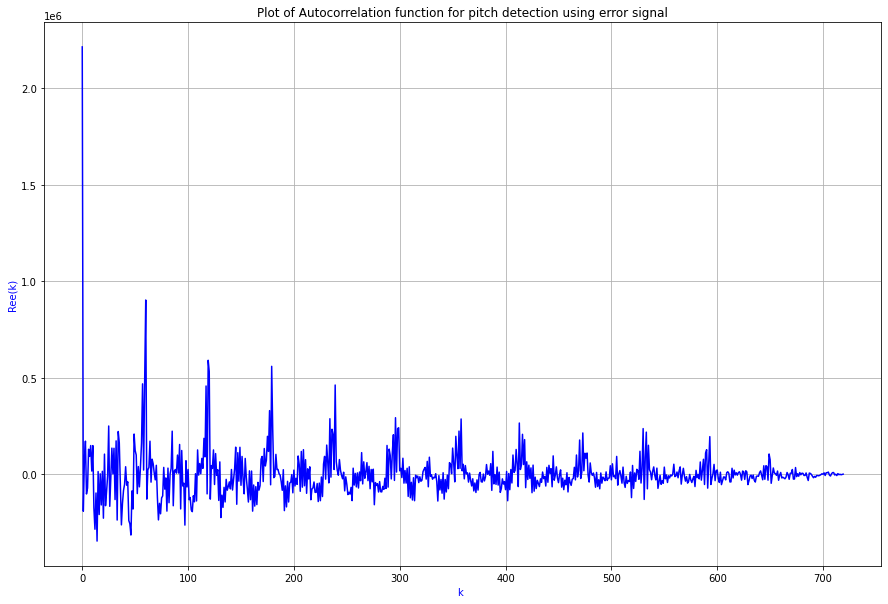

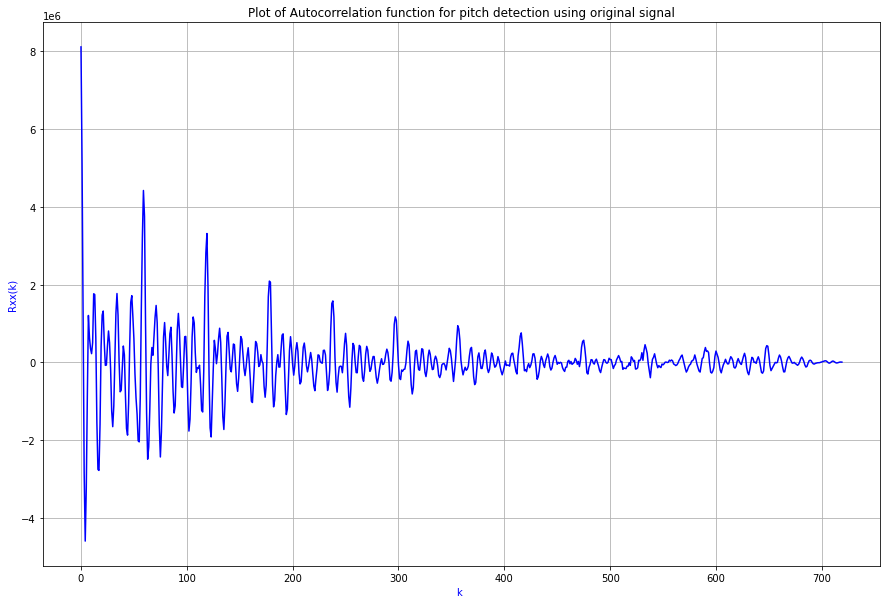

In [ ]:
p = 10;
ener,a = Levinson_Durbin(p,corr[0:p+1]);    # Calls the function which computes the LP coefficients
err = np.zeros((len(x),1));
x_norm = x;
for i in range(len(x_norm)):
  s = 0;                                                # Sum = 0 before every iteration
  for j in range(1,p+1,1):
    if (i-j) >= 0:                                      # calculate sum only when causal
      s = s + a[j-1]*x_norm[i-j];
  err[i] = x_norm[i] - s;                               # calculate the error signal

corr_err = scipy.signal.correlate(err, err, mode = 'full')[len(err)-1:];
corr_err = corr_err/len(err);
fig = plt.figure(figsize=(15, 10));
plt.title('Plot of Autocorrelation function for pitch detection using error signal'); # title of the plot
plt.plot(range(len(corr_err)), corr_err, color = 'b');
plt.ylabel('Ree(k)', color='b');                      # set the y axis label
plt.xlabel('k ',color='b');                           # set the discrete time axis label
plt.grid();                                           # display the grid of the plot
plt.axis('tight');                                    # sets limits just large enough to show all data
plt.show();

x_norm = x;
corr_orig = scipy.signal.correlate(x_norm, x_norm, mode = 'full')[len(x_norm)-1:];
corr_orig = corr_orig/len(x);
fig = plt.figure(figsize=(15, 10));
plt.title('Plot of Autocorrelation function for pitch detection using original signal'); # title of the plot
plt.plot(range(len(corr_orig)), corr_orig, color = 'b');
plt.ylabel('Rxx(k)', color='b');                      # set the y axis label
plt.xlabel('k ',color='b');                           # set the discrete time axis label
plt.grid();                                           # display the grid of the plot
plt.axis('tight');                                    # sets limits just large enough to show all data
plt.show();

In [ ]:
# Here we find out the Pitch period using the ACF of error signal
ind1 = np.argmax(corr_err[10:100]);   # finds the index corresponding to the maximum value between the indices 10 to 100 in the correlation array
max_ind1 = ind1+10;                   # actual index  = initial index + ind1
ind2 = np.argmax(corr_err[100:150]);  # Find the second F0 peak
max_ind2 = ind2+100;
print("Sampling frequency = "+str(fs)+" Hz"); # Print the sampling frequency of the waveform
to = (1/fs)*(max_ind2-max_ind1);        # calculate the pitch period using the sampling frequency
print("Pitch F0 calculated from ACF of error signal = "+str(1/to)+" Hz");         # display the F0 value calculated above

# Here we find out the Pitch period using the ACF of error signal
ind1 = np.argmax(corr_orig[10:100]);   # finds the index corresponding to the maximum value between the indices 10 to 100 in the correlation array
max_ind1 = ind1+10;                   # actual index  = initial index + ind1
ind2 = np.argmax(corr_orig[100:150]);  # Find the second F0 peak
max_ind2 = ind2+100;
to = (1/fs)*(max_ind2-max_ind1);        # calculate the pitch period using the sampling frequency
print("Pitch F0 calculated from ACF of original signal = "+str(1/to)+" Hz");         # display the F0 value calculated above

Sampling frequency = 8000 Hz
Pitch F0 calculated from ACF of error signal = 135.59322033898303 Hz
Pitch F0 calculated from ACF of original signal = 133.33333333333334 Hz


**Observations:**

1) We can calculate the pitch $F_{0}$ with a good accuracy by using the ACF of error signal.

2) I calculated the pitch period by taking the difference between their indices and multiplying this with sampling interval. Inverse of pitch period gives the $F_{0}$.

3) For periodic signals, the ACF contains peaks at regular intervals. These regular intervals are the pitch periods. By calculating this pitch period and taking its inverse will give $F_{0}$.

4) The calculated pitch period from ACF of error signal and that of actual signal differ only by 2.26 Hz.

5) The plots of original speech and residual signal are similar with respect to each other in the way that they have peaks corresponding to pitch periods at same regular intervals.

6) Both the ACF waveforms decay with time. ACF corresponding to original signal looks less noisy as compared to the ACF of error signal. But both waveforms are useful for accurately predicting the pitch $F_{0}$.

##Question 7##

In [ ]:
def createInpWaveform(sampFreq, timeDuration, F0, numSamplesTriangle):
    numCycles = F0*timeDuration;                          # number of cycles for given source excitation frequency
    numSamplesPerCycle = sampFreq/F0;                     # number of samples per cycle
    inpWaveform = np.zeros(int(sampFreq*timeDuration));   # input waveform declared as an array of zeros
    impulse = np.zeros(numSamplesTriangle);              # declare a impulse array which stores the samples of a single triangle
    for i in range(numSamplesTriangle):                   # For loop creates 1 impulse
      impulse[i] = 1;
    impulsePos = np.zeros(int(F0*timeDuration));            # This array contains the positions of impulses in the input signal
    impulseWaveform = np.zeros(int(sampFreq*timeDuration)); # This array will store the output of convolution
    for i in range(int(F0*timeDuration)):                   # In tis for loop an impulse train is created which contains impulses placed at sample indices according to the given F0
      impulsePos[i] = round((sampFreq/F0)*i);
      impulseWaveform[round((sampFreq/F0)*i)] = 1;
    inpWaveform = signal.convolve(impulseWaveform,impulse,mode='same');  # To create an impulse train
    return impulseWaveform                                      # Return the impulse train waveform

**Important points:**

1) The above function creates the input waveform for a given pitch frequency $F_{0}$, sampling frequency $f_{s}$ and time duration.

2) It returns the input waveform array which is essentially an impulse train with a period equal to pitch period.

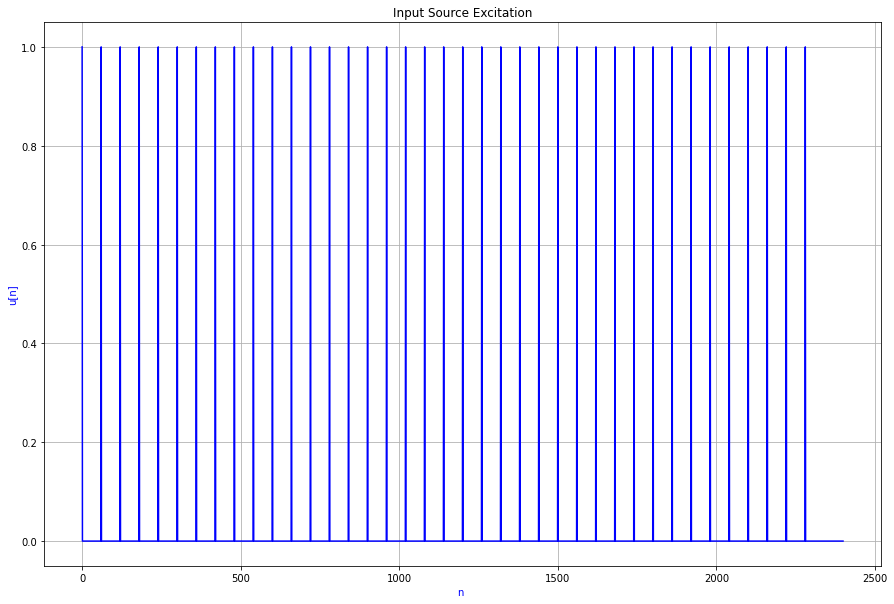

In [ ]:
'''
Pitch F0 = 133 Hz
Linear predictor order = 10
Duration = 300 ms = 0.3 sec
sampling rate = 8000 Hz
'''
fs = 8000;                            # sampling rate
duration = 0.3;                       # 300 ms signal to be generated
F0 = 133.33;                             # estimated pitch F0
source_excitn = createInpWaveform(8000, 0.3, F0, 1);  # function call to generate source excitation
fig = plt.figure(figsize=(15, 10));   # set figure size
plt.title('Input Source Excitation'); # title of the plot
plt.plot(range(len(source_excitn)), source_excitn, color = 'b');
plt.ylabel('u[n]', color='b');                      # set the y axis label
plt.xlabel('n ',color='b');                         # set the discrete time axis label
plt.grid();                                         # display the grid of the plot
plt.axis('tight');                                  # sets limits just large enough to show all data
plt.show();

**Important points:**

1) For sampling frequency of $8000$ Hz and to generate a signal with time duration of 300 ms we need a source excitation signal having $2400$ samples.

2) As given in question I have generated an impulse train of $2400$ samples. The impulses are separated by $\frac{8000}{133} = 60$ (approx) samples between each pair of impulses.

3) This impulse train sequence acts as a source excitation which will be used by us to reconstruct the speech signal using the parameters estimated in the previous questions of the assignment.

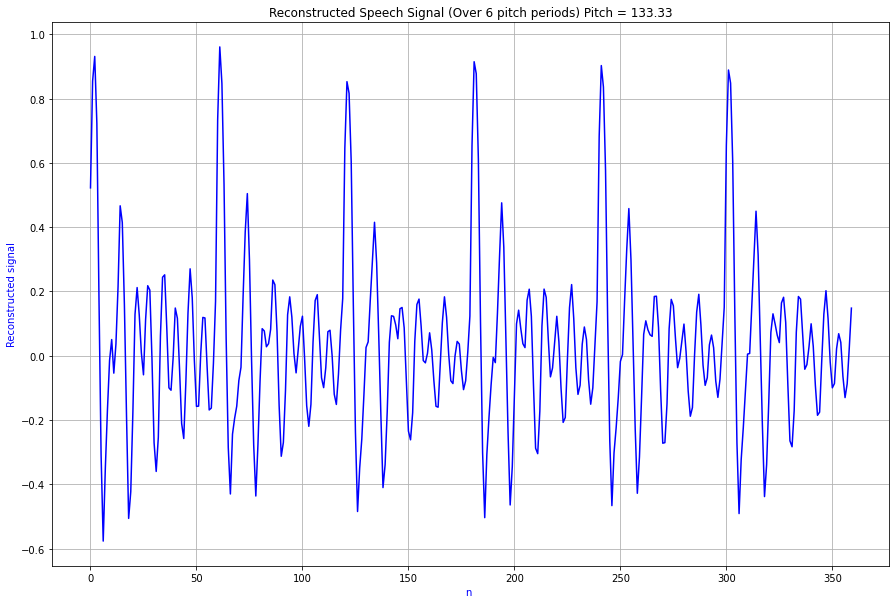

In [ ]:
p = 10;
ener,a = Levinson_Durbin(p,corr[0:p+1]);                # Calls the function which computes the LP coefficients
err = np.zeros((len(x),1));                             # declare a numpy array for error signal
x_norm = x/np.linalg.norm(x);                           # normalize the original signal
for i in range(len(x_norm)):                            # for loop to find out gain for 10th order linear predictor
  s = 0;                                                # Sum = 0 before every iteration
  for j in range(1,p+1,1):
    if (i-j) >= 0:                                      # calculate sum only when causal
      s = s + a[j-1]*x_norm[i-j];
  err[i] = x_norm[i] - s;                               # calculate the error signal
gain = np.sqrt(np.sum(np.square(err)));                 # Calculate gain for speech synthesis
speech = np.zeros((len(source_excitn),1));

for i in range(len(source_excitn)):                     # apply source excitation and find output using the difference equation method
  s = 0;
  for j in range(1,p+1,1):
    if (i-j)>=0:
      s = s + a[j-1]*speech[i-j];
  speech[i] = gain*source_excitn[i] + s;                # Regenerate the speech signal from the spource excitation

# CARRYING OUT DE-EMPHASIS ON THE SYNTHESISED SPEECH SIGNAL

sp_out = np.zeros(np.size(speech));
sp_out[0] = speech[0];
for i in range(1,len(speech),1):
  sp_out[i] = speech[i] + 0.6969*sp_out[i-1];

speech = sp_out;

fig = plt.figure(figsize=(15, 10));
plt.title('Reconstructed Speech Signal (Over 6 pitch periods) Pitch = '+str(F0)); # title of the plot
plt.plot(range(len(speech[0:round((fs/F0)*6)])), speech[0:round((fs/F0)*6)], color = 'b');
plt.ylabel('Reconstructed signal', color='b');       # set the y axis label
plt.xlabel('n ',color='b');                          # set the discrete time axis label
plt.grid();                                          # display the grid of the plot
plt.axis('tight');                                   # sets limits just large enough to show all data
plt.show();

speech_output = np.asarray(speech,dtype=np.float32);                   # Save the output data array in float32 format to create a .wav file
scipy.io.wavfile.write('Que7_recon.wav', fs, speech_output);           # create a .wav file
IPython.display.Audio('Que7_recon.wav')                                # Display the created audio file

**Important Points:**

1) The source excitation generated earlier was applied to the filter having order $10$, gain and coefficients $a_{k}$ were calculated for this order and a difference equation was formed.

2) Using this $10^{th}$ order difference equation, each sample of reconstructed speech signal was calculated.

3) Reconstructed speech signal has been plotted above and upon listening to it, it clearly sounds like the /a/ vowel.

4) The reconstructed and original sounds seems similar (reconstructed sound seems slightly like a robotic sound) and the listener can identify that vowel /a/ is being played.

5) De-emphasis was also applied to the signal.

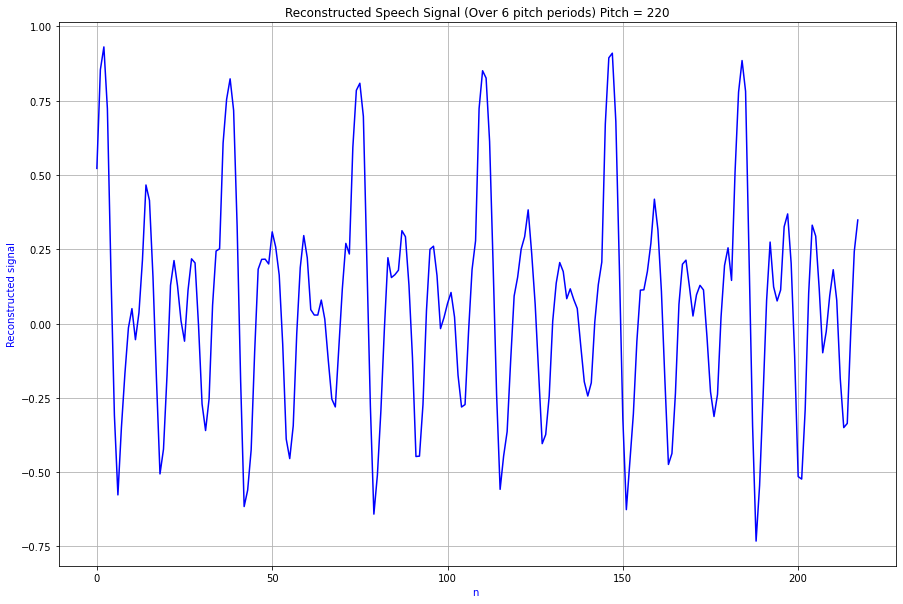

In [ ]:
# ANALYSING THE EFFECT OF CHANGING THE PITCH ON GENERATED SOUND

F0 = 220;
source_excitn = createInpWaveform(8000, 0.3, F0, 1);  # function call to generate source excitation
p = 10;
ener,a = Levinson_Durbin(p,corr[0:p+1]);                # Calls the function which computes the LP coefficients
err = np.zeros((len(x),1));                             # declare a numpy array for error signal
x_norm = x/np.linalg.norm(x);                           # normalize the original signal
for i in range(len(x_norm)):                            # for loop to find out gain for 10th order linear predictor
  s = 0;                                                # Sum = 0 before every iteration
  for j in range(1,p+1,1):
    if (i-j) >= 0:                                      # calculate sum only when causal
      s = s + a[j-1]*x_norm[i-j];
  err[i] = x_norm[i] - s;                               # calculate the error signal
gain = np.sqrt(np.sum(np.square(err)));                 # Calculate gain for speech synthesis
speech = np.zeros((len(source_excitn),1));

for i in range(len(source_excitn)):                     # apply source excitation and find output using the difference equation method
  s = 0;
  for j in range(1,p+1,1):
    if (i-j)>=0:
      s = s + a[j-1]*speech[i-j];
  speech[i] = gain*source_excitn[i] + s;                # Regenerate the speech signal from the spource excitation

# CARRYING OUT DE-EMPHASIS ON THE SYNTHESISED SPEECH SIGNAL

sp_out = np.zeros(np.size(speech));
sp_out[0] = speech[0];
for i in range(1,len(speech),1):
  sp_out[i] = speech[i] + 0.6969*sp_out[i-1];

speech = sp_out;

fig = plt.figure(figsize=(15, 10));
plt.title('Reconstructed Speech Signal (Over 6 pitch periods) Pitch = '+str(F0)); # title of the plot
plt.plot(range(len(speech[0:round((fs/F0)*6)])), speech[0:round((fs/F0)*6)], color = 'b');
plt.ylabel('Reconstructed signal', color='b');       # set the y axis label
plt.xlabel('n ',color='b');                          # set the discrete time axis label
plt.grid();                                          # display the grid of the plot
plt.axis('tight');                                   # sets limits just large enough to show all data
plt.show();

speech_output = np.asarray(speech,dtype=np.float32);                   # Save the output data array in float32 format to create a .wav file
scipy.io.wavfile.write('Que7_modified1.wav', fs, speech_output);           # create a .wav file
IPython.display.Audio('Que7_modified1.wav')                                # Display the created audio file

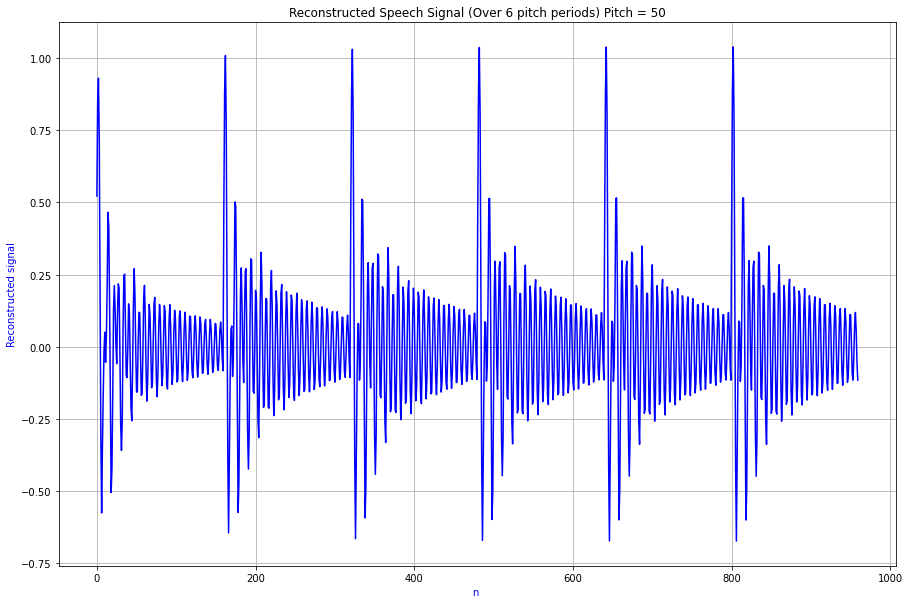

In [ ]:
# ANALYSING THE EFFECT OF CHANGING THE PITCH ON GENERATED SOUND

F0 = 50;
source_excitn = createInpWaveform(8000, 0.3, F0, 1);  # function call to generate source excitation
p = 10;
ener,a = Levinson_Durbin(p,corr[0:p+1]);                # Calls the function which computes the LP coefficients
err = np.zeros((len(x),1));                             # declare a numpy array for error signal
x_norm = x/np.linalg.norm(x);                           # normalize the original signal
for i in range(len(x_norm)):                            # for loop to find out gain for 10th order linear predictor
  s = 0;                                                # Sum = 0 before every iteration
  for j in range(1,p+1,1):
    if (i-j) >= 0:                                      # calculate sum only when causal
      s = s + a[j-1]*x_norm[i-j];
  err[i] = x_norm[i] - s;                               # calculate the error signal
gain = np.sqrt(np.sum(np.square(err)));                 # Calculate gain for speech synthesis
speech = np.zeros((len(source_excitn),1));

for i in range(len(source_excitn)):                     # apply source excitation and find output using the difference equation method
  s = 0;
  for j in range(1,p+1,1):
    if (i-j)>=0:
      s = s + a[j-1]*speech[i-j];
  speech[i] = gain*source_excitn[i] + s;                # Regenerate the speech signal from the spource excitation

# CARRYING OUT DE-EMPHASIS ON THE SYNTHESISED SPEECH SIGNAL

sp_out = np.zeros(np.size(speech));
sp_out[0] = speech[0];
for i in range(1,len(speech),1):
  sp_out[i] = speech[i] + 0.6969*sp_out[i-1];

speech = sp_out;

fig = plt.figure(figsize=(15, 10));
plt.title('Reconstructed Speech Signal (Over 6 pitch periods) Pitch = '+str(F0)); # title of the plot
plt.plot(range(len(speech[0:round((fs/F0)*6)])), speech[0:round((fs/F0)*6)], color = 'b');
plt.ylabel('Reconstructed signal', color='b');       # set the y axis label
plt.xlabel('n ',color='b');                          # set the discrete time axis label
plt.grid();                                          # display the grid of the plot
plt.axis('tight');                                   # sets limits just large enough to show all data
plt.show();

speech_output = np.asarray(speech,dtype=np.float32);                   # Save the output data array in float32 format to create a .wav file
scipy.io.wavfile.write('Que7_modified2.wav', fs, speech_output);           # create a .wav file
IPython.display.Audio('Que7_modified2.wav')                                # Display the created audio file

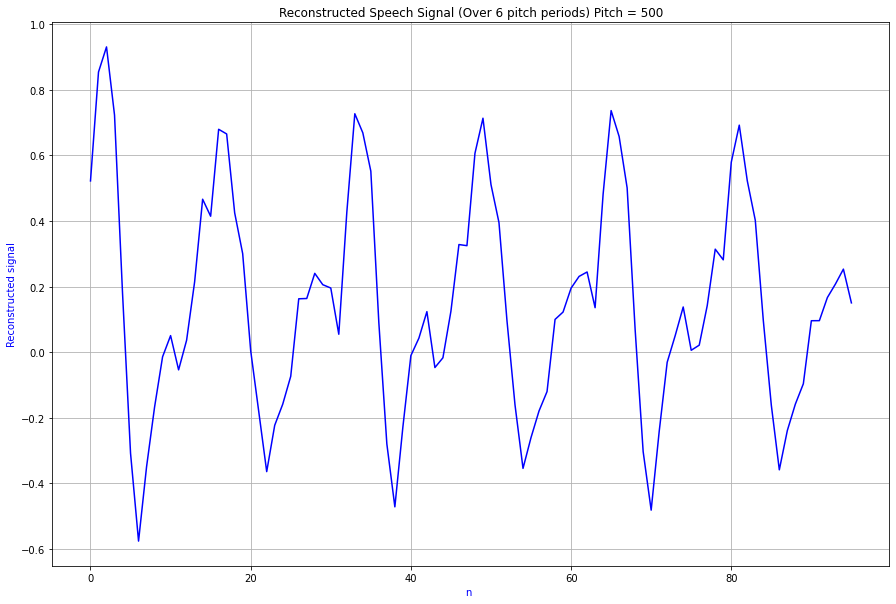

In [ ]:
# ANALYSING THE EFFECT OF CHANGING THE PITCH ON GENERATED SOUND

F0 = 500;
source_excitn = createInpWaveform(8000, 0.3, F0, 1);  # function call to generate source excitation
p = 10;
ener,a = Levinson_Durbin(p,corr[0:p+1]);                # Calls the function which computes the LP coefficients
err = np.zeros((len(x),1));                             # declare a numpy array for error signal
x_norm = x/np.linalg.norm(x);                           # normalize the original signal
for i in range(len(x_norm)):                            # for loop to find out gain for 10th order linear predictor
  s = 0;                                                # Sum = 0 before every iteration
  for j in range(1,p+1,1):
    if (i-j) >= 0:                                      # calculate sum only when causal
      s = s + a[j-1]*x_norm[i-j];
  err[i] = x_norm[i] - s;                               # calculate the error signal
gain = np.sqrt(np.sum(np.square(err)));                 # Calculate gain for speech synthesis
speech = np.zeros((len(source_excitn),1));

for i in range(len(source_excitn)):                     # apply source excitation and find output using the difference equation method
  s = 0;
  for j in range(1,p+1,1):
    if (i-j)>=0:
      s = s + a[j-1]*speech[i-j];
  speech[i] = gain*source_excitn[i] + s;                # Regenerate the speech signal from the spource excitation

# CARRYING OUT DE-EMPHASIS ON THE SYNTHESISED SPEECH SIGNAL

sp_out = np.zeros(np.size(speech));
sp_out[0] = speech[0];
for i in range(1,len(speech),1):
  sp_out[i] = speech[i] + 0.6969*sp_out[i-1];

speech = sp_out;

fig = plt.figure(figsize=(15, 10));
plt.title('Reconstructed Speech Signal (Over 6 pitch periods) Pitch = '+str(F0)); # title of the plot
plt.plot(range(len(speech[0:round((fs/F0)*6)])), speech[0:round((fs/F0)*6)], color = 'b');
plt.ylabel('Reconstructed signal', color='b');       # set the y axis label
plt.xlabel('n ',color='b');                          # set the discrete time axis label
plt.grid();                                          # display the grid of the plot
plt.axis('tight');                                   # sets limits just large enough to show all data
plt.show();

speech_output = np.asarray(speech,dtype=np.float32);                   # Save the output data array in float32 format to create a .wav file
scipy.io.wavfile.write('Que7_modified3.wav', fs, speech_output);           # create a .wav file
IPython.display.Audio('Que7_modified3.wav')                                # Display the created audio file

**Important points:**

1) In the above code cells, we have analyzed the effect of variation in the pitch on the generated sound. We have taken pitch frequencies as $220$ Hz, $50$ Hz and $500$ Hz.

2) As the pitch increases the sound becomes more shrill.

3) /a/ sounds with a lower pitch are hoarse to hear. While /a/ sound with high pitch was soft.

4) Linear prediction coefficients which were generated for /a/ sound with $133 $ Hz pitch were used to reconstruct sound for other pitches. In the reconstructed sound the basic nature of /a/ sound is retained just the voice quality changes. As pitch increases from lower values to higher values, the reconstructed voice becomes more shrill.